*问题：房间内有 100 人，每人有 100 块，每分钟随机    

给另一个人 1 块钱，最后这个房间内的财富分布怎样？
（知乎：https://www.zhihu.com/question/62250384/answer/201726206）
建议各位先想想，你认为在完全随机的情况下，最终的
财富分配情况是怎样的？

我们不妨把这场游戏视作在一颗叫做“埃博拉”的遥远星球上社会运
行和财富分配的简化模型，从而模拟这个世界的运行规律。我们假设：
* 每个人在18岁带着100元的初始资金开始玩游戏，
* 每天玩一次，一直玩到80岁的人均寿命。
* “每天拿出一元钱”可理解为基本的日常消费，“获得财富的概率也是完全随机”
* 这颗星球上普通智慧生命的平均寿命80岁；那么一生要玩20000次游戏，即获得20000次财富分配的机会！    

对于世界的角色做出如下假设(以下代码仅考虑qian)
* 假设1 – 负债情况 （投机者：即使财富为负依然消费）
* 假设2 – 努力工作 （奋斗者：获得财富的几率多1%）
* 假设3 – 存款利率 （投资者：持有财富的年利率是3%）
* 假设4 – 技术进步 （学习者：更多知识意味着更大几率获得更多财富）
* 假设5 – 生老病死… （唯物乐观者）
* 假设6 – 政府介入… (税收+低保)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False


id=[i for i in range(1,101)]
fortune=[100 for i in range(100)]#初始化财富
roles=['奋斗者','投资者','投机者','普通人']
role=['奋斗者']*10+['投资者']*10+['投机者']*10+['普通人']*70
color=['orange']*10+['r']*10+['g']*10+['gray']*70
p_value=[0.0101]*10+[0.899/90]*90#初始化概率

df=pd.DataFrame({
    'id':id,
    'fortune':fortune,
    'role':role,
    "p":p_value,
    'color':color
})
df.head()

,id,fortune,role,p,color
0,1,100,奋斗者,0.0101,orange
1,2,100,奋斗者,0.0101,orange
2,3,100,奋斗者,0.0101,orange
3,4,100,奋斗者,0.0101,orange
4,5,100,奋斗者,0.0101,orange


In [2]:
rounds=200
for i in range(rounds):

    if(i%365==0):#每年投资者的收益增加
        index=df[df['role']=='投资者'].index
        df.loc[index,'fortune']=df.loc[index,'fortune']*1.03
    for j in range(100):#遍历每个人
        df['fortune'][j]= df['fortune'][j]-1#
        
        while(True):
            r1=np.random.choice(df['id'],p=df['p'])-1
            if(r1!=j):
                break
        df.iloc[r1,1]+=1
    index0=df.loc[(df['role']=='普通人') & (df['fortune']<0)].index#找到普通人资产小于0的部分
    df.loc[index0,'fortune']=0
    print("\r模拟进度：{:.2f}%".format((i+1)/rounds*100),end=" ",flush=True)
df=df.sort_values(by='fortune').reset_index()

模拟进度：100.00% 

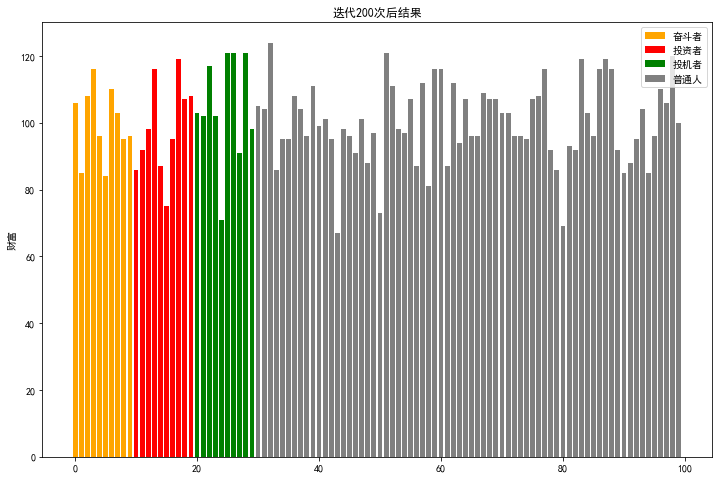

<Figure size 432x288 with 0 Axes>

In [16]:

plt.figure(figsize=(12,8))
plt.title("迭代{}次后结果".format(rounds))
plt.bar(np.arange(len(df)),df['fortune'],color=df['color'],label=df['role'])

#绘制图例
r1=plt.Rectangle((0,0),1,1,fc="orange", edgecolor = 'none') 
r2=plt.Rectangle((0,0),1,1,fc='r',  edgecolor = 'none')
r3=plt.Rectangle((0,0),1,1,fc='g',  edgecolor = 'none')
r4=plt.Rectangle((0,0),1,1,fc='gray',  edgecolor = 'none')
plt.legend([r1,r2,r3,r4], roles)
plt.ylabel("财富")
plt.show()
plt.savefig('res1.jpg')

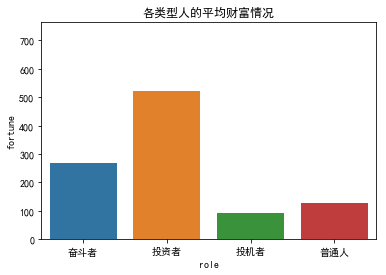

In [202]:
plt.title('各类型人的平均财富情况')
sb.barplot(df.role,df.fortune,errwidth=0,order=roles)